In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.axes_grid1 import ImageGrid
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

In [5]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
results_dir = rdrive + 'processed_results/'
mll_gam = rdrive + 'mll/gam_spec/'
mll_nuc = rdrive + 'mll/nuc_conc/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'
dets = ['nuc29', 'act32', 'act4/9', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
pred = ['reactor', 'burnup', 'enrichment', 'cooling']
predmll = ['ReactorType', 'Burnup', 'Enrichment', 'CoolingTime']
cm_labels = ['pwr', 'bwr', 'phwr']
cm_LBLS = ['PWR', 'BWR', 'PHWR']

In [6]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("white", "black"),
                     threshold=None, **textkw):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.
    # Set default alignment to center, but allow it to be overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def im_cm(data, row_labels, col_labels, ax=None,
          cbar_kw={}, **kwargs):
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, vmin=0, vmax=1, **kwargs)

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    ax.tick_params(top=False, bottom=True, labelsize=14,
                   labeltop=False, labelbottom=True)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=6)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im


def plot_cm(knn, dtr, mll):
    
    mll_cm = confusion_matrix(mll[predmll[0]], mll['pred_' + predmll[0]], labels=cm_labels, normalize='true')
    mll_cm_nums = confusion_matrix(mll[predmll[0]], mll['pred_' + predmll[0]], labels=cm_labels)
    knn_cm = confusion_matrix(knn['TrueY'], knn['kNN'], labels=cm_labels, normalize='true')
    knn_cm_nums = confusion_matrix(knn['TrueY'], knn['kNN'], labels=cm_labels)
    dtr_cm = confusion_matrix(dtr['TrueY'], dtr['DTree'], labels=cm_labels, normalize='true')
    dtr_cm_nums = confusion_matrix(dtr['TrueY'], dtr['DTree'], labels=cm_labels)
    cm_list = [knn_cm, dtr_cm, mll_cm]
    cm_nums = [knn_cm_nums, dtr_cm_nums, mll_cm_nums]
    for cm in cm_nums:
        print(cm)
    
    plt.clf()
    titles = ['kNN', 'DTree', 'MLL']
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(15,5))
    for a, ax in enumerate(axs):
        im = im_cm(cm_list[a], cm_LBLS, cm_LBLS, ax=ax, cmap='viridis')
        texts = annotate_heatmap(im, valfmt='{x:.3f}', threshold=0.6)
        ax.set_title(titles[a], fontsize=18, pad=15)
    axs[0].set_ylabel('True label', fontsize=16)
    axs[1].set_xlabel('Predicted label', fontsize=16, labelpad=10)
    
    plt.subplots_adjust(wspace=0.1)
    cax = fig.add_axes([0.915, 0.15, 0.03, 0.7])
    fig.colorbar(im, cax=cax)
    cax.tick_params(labelsize=14)
    plt.show()
    return fig

# Confusion Matrix for Reactor Type Results

### sfcompo

In [7]:
mll = pd.read_csv(mll_nuc + 'sfco/Job0_unc0.01_impnull/Job0_unc0.01_impnull.csv')
knn = pd.read_csv(learn_nuc + 'sfco/reactor_knn_tset1.0_nuc29_impnull_ext_test_compare.csv')
dtr = pd.read_csv(learn_nuc + 'sfco/reactor_dtree_tset1.0_nuc29_impnull_ext_test_compare.csv')

[[147 165   0]
 [ 47 117   1]
 [  0  28   0]]
[[212 100   0]
 [ 74  91   0]
 [  0  28   0]]
[[ 68 244   0]
 [ 37 127   1]
 [  0  28   0]]


<Figure size 432x288 with 0 Axes>

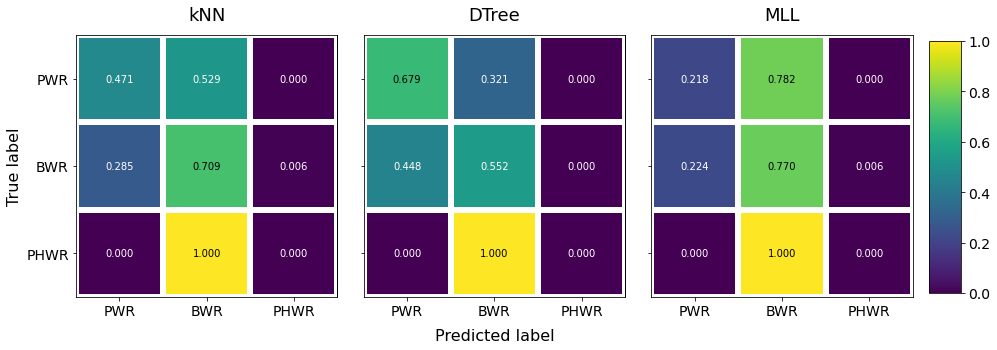

In [8]:
fig = plot_cm(knn, dtr, mll)
sv_fig = './plots/confusion_matrix_sfco_impnull.png'
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

In [9]:
mll_0 = pd.read_csv(mll_nuc + 'sfco/Job1_unc0.01_0null/Job1_unc0.01_0null.csv')
knn_0 = pd.read_csv(learn_nuc + 'sfco/reactor_knn_tset1.0_nuc29_0null_ext_test_compare.csv')
dtr_0 = pd.read_csv(learn_nuc + 'sfco/reactor_dtree_tset1.0_nuc29_0null_ext_test_compare.csv')

[[ 61 251   0]
 [  4 160   1]
 [  0  21   7]]
[[ 40 272   0]
 [  6 159   0]
 [  1  13  14]]
[[248  64   0]
 [ 75  89   1]
 [  1   1  26]]


<Figure size 432x288 with 0 Axes>

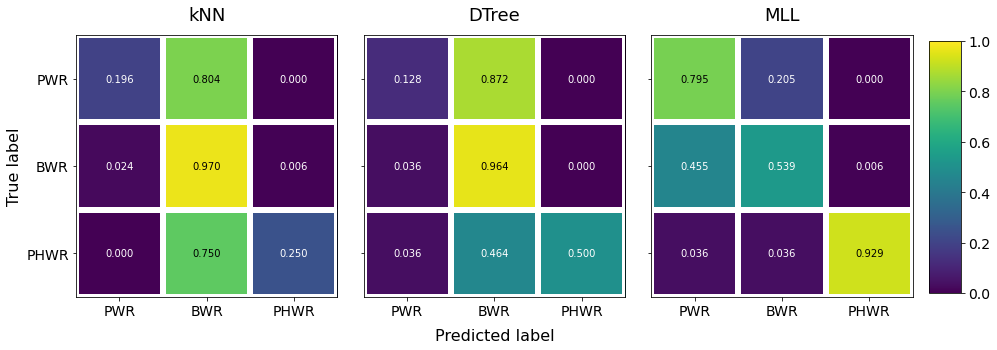

In [10]:
fig = plot_cm(knn_0, dtr_0, mll_0)
sv_fig = './plots/confusion_matrix_sfco_0null.png'
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

### nuc29, 1% error case

In [11]:
mll = pd.read_csv(mll_nuc + 'nuc29/Job0_unc0.01/Job0_unc0.01.csv')
knn = pd.read_csv(learn_nuc + 'cv_pred/cv5/nuc29/reactor_knn_tset1.0_nuc29_predictions.csv')
dtr = pd.read_csv(learn_nuc + 'cv_pred/cv5/nuc29/reactor_dtree_tset1.0_nuc29_predictions.csv')

[[120481    479      0]
 [   300 322260      0]
 [     0      0   6720]]
[[120430    530      0]
 [   455 322103      2]
 [     0      3   6717]]
[[119047   1913      0]
 [  1634 320926      0]
 [     0      0   6720]]


<Figure size 432x288 with 0 Axes>

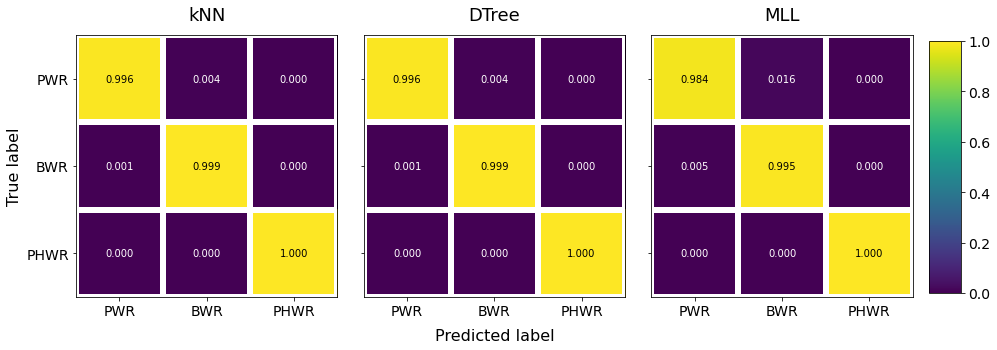

In [12]:
fig = plot_cm(knn, dtr, mll)
sv_fig = './plots/confusion_matrix_nuc29_err01.png'
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

### nuc29, 10% error case

In [13]:
mll = pd.read_csv(mll_nuc + 'nuc29/Job2_unc0.1/Job2_unc0.1.csv')
knn = pd.read_csv(learn_nuc + 'rand_err/reactor_knn_tset1.0_nuc29_err10_random_error.csv')
dtr = pd.read_csv(learn_nuc + 'rand_err/reactor_dtree_tset1.0_nuc29_err10_random_error.csv')

[[107237  13723      0]
 [ 11046 311514      0]
 [     0      2   6718]]
[[108451  12509      0]
 [ 11571 310974     15]
 [     1     19   6700]]
[[118852   2108      0]
 [  1460 321100      0]
 [     0      0   6720]]


<Figure size 432x288 with 0 Axes>

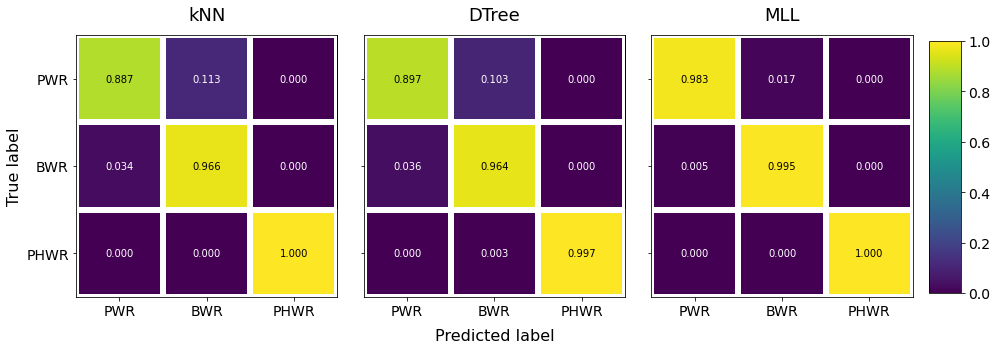

In [14]:
fig = plot_cm(knn, dtr, mll)
sv_fig = './plots/confusion_matrix_nuc29_err10.png'
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

### nuc29, 20% error case

In [15]:
mll = pd.read_csv(mll_nuc + 'nuc29/Job4_unc0.2/Job4_unc0.2.csv')
knn = pd.read_csv(learn_nuc + 'rand_err/reactor_knn_tset1.0_nuc29_err20_random_error.csv')
dtr = pd.read_csv(learn_nuc + 'rand_err/reactor_dtree_tset1.0_nuc29_err20_random_error.csv')

[[ 91146  29814      0]
 [ 25462 297056     42]
 [     0    100   6620]]
[[ 96343  24611      6]
 [ 23500 299000     60]
 [     8     82   6630]]
[[114235   6725      0]
 [  1619 320941      0]
 [     0      0   6720]]


<Figure size 432x288 with 0 Axes>

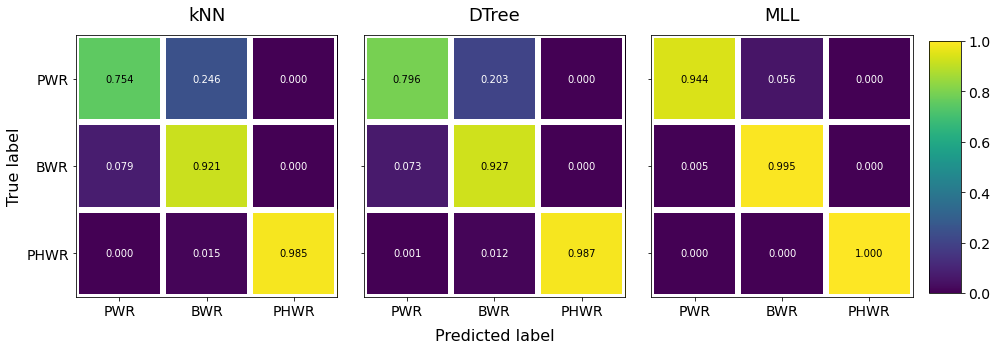

In [16]:
fig = plot_cm(knn, dtr, mll)
sv_fig = './plots/confusion_matrix_nuc29_err20.png'
fig.savefig(sv_fig, bbox_inches='tight', transparent=True)

### act32 case

In [67]:
mll_a32 = pd.read_csv(mll_gam + 'act32/Job0_unc0.05/Job0_unc0.05.csv')
knn_a32 = pd.read_csv(learn_gam + 'test_0.067_only/act32/reactor_knn_tset1.0_act32_mimic_mll.csv')
dtr_a32 = pd.read_csv(learn_gam + 'test_0.067_only/act32/reactor_dtree_tset1.0_act32_mimic_mll.csv')

<Figure size 432x288 with 0 Axes>

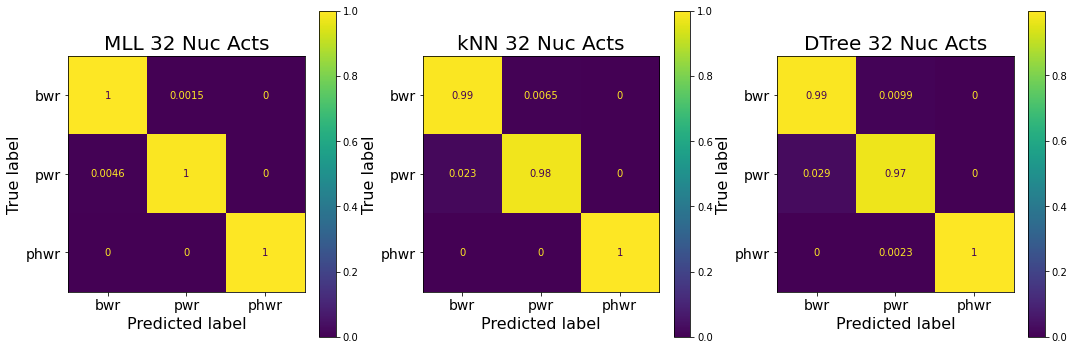

In [70]:
plot_cm([mll_cm, knn_cm, dtr_cm], ' 32 Nuc Acts')

### lab HPGe (d1) n31 case

In [72]:
mll_n31 = pd.read_csv(mll_gam + 'd1_n31/Job1_unc0.0/Job1_unc0.0.csv')
knn_n31 = pd.read_csv(learn_gam + 'test_0.067_only/n31/reactor_knn_tset1.0_d1_hpge_mimic_mll.csv')
dtr_n31 = pd.read_csv(learn_gam + 'test_0.067_only/n31/reactor_dtree_tset1.0_d1_hpge_mimic_mll.csv')

<Figure size 432x288 with 0 Axes>

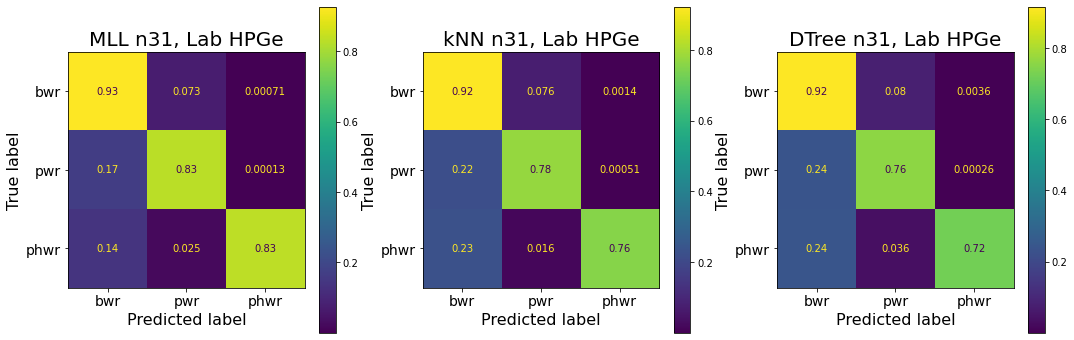

In [74]:
plot_cm([mll_cm, knn_cm, dtr_cm], ' n31, Lab HPGe')

### lab HPGe (d1) auto case

In [76]:
mll_auto = pd.read_csv(mll_gam + 'd1_auto/Job1_unc0.0/Job1_unc0.0.csv')
knn_auto = pd.read_csv(learn_gam + 'test_0.067_only/auto/reactor_knn_tset1.0_d1_hpge_mimic_mll.csv')
dtr_auto = pd.read_csv(learn_gam + 'test_0.067_only/auto/reactor_dtree_tset1.0_d1_hpge_mimic_mll.csv')

<Figure size 432x288 with 0 Axes>

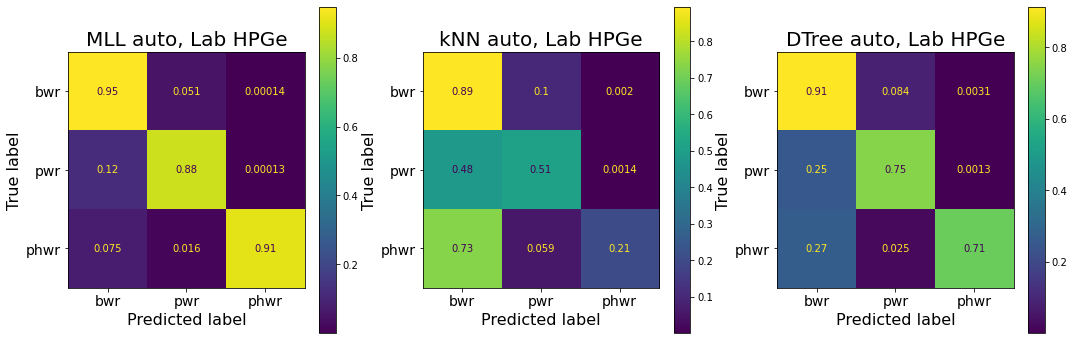

In [78]:
plot_cm([mll_cm, knn_cm, dtr_cm], ' auto, Lab HPGe')